In [102]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

# 读取数据 & 数据探索

In [103]:
dpath = './data/'

train = pd.read_csv(dpath +"RentListingInquries_FE_train.csv")
test = pd.read_csv(dpath +"RentListingInquries_FE_test.csv")

test.head()

,listing_id,bathrooms,bedrooms,latitude,longitude,price,price_bathrooms,price_bedrooms,room_diff,room_num,...,virtual,walk,walls,war,washer,water,wheelchair,wifi,windows,work
0,7142618,1.0,1,40.7185,-73.9865,2950,1475.000000,1475.000000,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,7210040,1.0,2,40.7278,-74.0000,2850,1425.000000,950.000000,-1.0,3.0,...,0,0,0,1,0,0,0,0,0,0
2,7103890,1.0,1,40.7306,-73.9890,3758,1879.000000,1879.000000,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,7143442,1.0,2,40.7109,-73.9571,3300,1650.000000,1100.000000,-1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,6860601,2.0,2,40.7650,-73.9845,4900,1633.333333,1633.333333,0.0,4.0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Columns: 225 entries, bathrooms to interest_level
dtypes: float64(7), int64(218)
memory usage: 84.7 MB


In [105]:
train.describe()

,bathrooms,bedrooms,latitude,longitude,price,price_bathrooms,price_bedrooms,room_diff,room_num,Year,...,walk,walls,war,washer,water,wheelchair,wifi,windows,work,interest_level
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,4.935200e+04,4.935200e+04,49352.000000,49352.000000,49352.0,...,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,1.697863e+03,1.657567e+03,-0.329460,2.753820,2016.0,...,0.003080,0.000385,0.186477,0.009361,0.000446,0.028165,0.002026,0.001013,0.000952,1.616895
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,1.100477e+04,7.817996e+03,0.947732,1.446091,0.0,...,0.055412,0.019618,0.389495,0.101625,0.021109,0.165446,0.044969,0.031814,0.030846,0.626035
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,2.150000e+01,4.300000e+01,-5.000000,0.000000,2016.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,1.225000e+03,1.066667e+03,-1.000000,2.000000,2016.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,1.500000e+03,1.383417e+03,0.000000,2.000000,2016.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,1.850000e+03,1.962500e+03,0.000000,4.000000,2016.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,2.245000e+06,1.496667e+06,8.000000,13.500000,2016.0,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


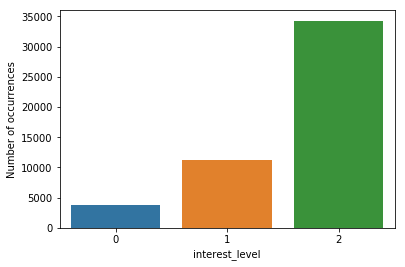

In [106]:
sns.countplot(train.interest_level);
pyplot.xlabel('interest_level');
pyplot.ylabel('Number of occurrences');

In [107]:
# drop ids and get labels

y_train = train['interest_level']  

train = train.drop(["interest_level"], axis=1)
X_train = np.array(train)


# n_trains = 2000
n_trains = 4000

X_train = X_train[:n_trains]
y_train = y_train[:n_trains]

test_id = test['listing_id'] 
X_test = test.drop(["listing_id"], axis=1)


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Columns: 224 entries, bathrooms to work
dtypes: float64(7), int64(217)
memory usage: 84.3 MB


# 数据标准化

In [109]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

print (X_train)
print (X_train.size)



[[ 0.60742046  1.3519126  -0.93009742 ..., -0.0548546  -0.0316386
  -0.02236627]
 [-0.38266994  0.44275819  1.11731573 ..., -0.0548546  -0.0316386
  -0.02236627]
 [-0.38266994 -0.46639621 -0.30974655 ..., -0.0548546  -0.0316386
  -0.02236627]
 ..., 
 [-0.38266994  0.44275819  0.49951775 ..., -0.0548546  -0.0316386
  -0.02236627]
 [ 1.59751085  0.44275819 -0.6901263  ..., -0.0548546  -0.0316386
  -0.02236627]
 [-0.38266994 -0.46639621  0.42548411 ..., -0.0548546  -0.0316386
  -0.02236627]]
448000


# 模型训练

## default Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [111]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print ('cv logloss is:', -loss.mean())

logloss of each fold is:  [ 0.83865495  0.83500427  0.94526148  0.87455438  0.80206231]
cv logloss is: 0.859107478221


# 正则化的 Logistic Regression

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

penaltys =['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]

tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

grid.cv_results_

print(-grid.best_score_)
print(grid.best_params_)

0.723101794931
{'C': 0.1, 'penalty': 'l1'}


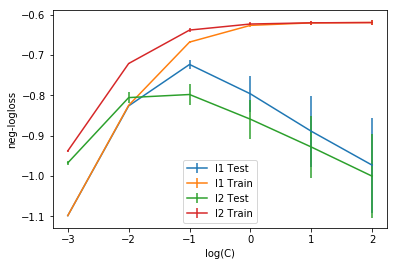

In [113]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()




# L1正则

In [114]:
### 用LogisticRegressionCV实现正则化的 Logistic Regressio

from sklearn.linear_model import LogisticRegressionCV

Cs = [0.01, 0.1, 1, 10,100]

# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(X_train, y_train)    


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [115]:
lrcv_L1.scores_

{0: array([[-0.30775521, -0.26567407, -0.28366836, -0.29696044, -0.31303123],
        [-0.30775521, -0.25602272, -0.28793995, -0.31303153, -0.33070218],
        [-0.30808415, -0.2603946 , -0.28723493, -0.31732162, -0.3434482 ],
        [-0.30431026, -0.23653853, -0.3005664 , -0.37547647, -0.44505227],
        [-0.30431026, -0.24405353, -0.24546961, -0.25430977, -0.26497584]]),
 1: array([[-0.56185351, -0.51248043, -0.54183358, -0.56713248, -0.59392643],
        [-0.56218215, -0.50378953, -0.52836459, -0.64867344, -0.75975554],
        [-0.55928374, -0.51457778, -0.64404117, -0.79045593, -0.87953414],
        [-0.560473  , -0.51446738, -0.55256938, -0.60040474, -0.67241331],
        [-0.56015845, -0.52605291, -0.54685057, -0.5608807 , -0.57353957]]),
 2: array([[-0.60412029, -0.53100133, -0.559122  , -0.58920988, -0.6336352 ],
        [-0.6034295 , -0.5166689 , -0.53615649, -0.59536936, -0.66275785],
        [-0.60642802, -0.54785881, -0.66755855, -0.77559928, -0.87384364],
        [-0.

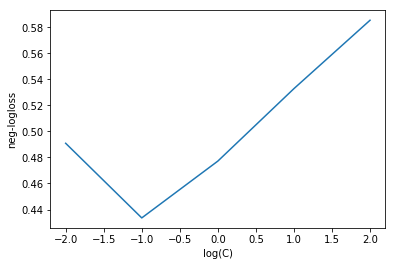

In [116]:
n_Cs = len(Cs)
n_classes = 3
scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lrcv_L1.scores_[j],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()


In [117]:
lrcv_L1.coef_

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -8.92396897e-01,
         -5.19071037e-01,  -4.91004103e-02,   0.00000000e+00,
          0.00000000e+00,   7.22854400e-02,  -7.12233636e-02,
          0.00000000e+00,   0.00000000e+00,   3.03576253e-01,
          0.00000000e+00,  -5.77905592e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -3.89250477e-03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -2.15769846e-02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.35195288e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

# L2

In [118]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [0.01, 0.1, 1, 10,100,1000]

# LogisticRegressionCV比GridSearchCV快
lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', multi_class='ovr')
lrcv_L2.fit(X_train, y_train)   

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100, 1000], class_weight=None,
           cv=5, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='lbfgs', tol=0.0001, verbose=0)

In [119]:
lrcv_L2.scores_

{0: array([[-0.26460943, -0.27045615, -0.28747284, -0.30228071, -0.32775956,
         -0.35043726],
        [-0.27131646, -0.2868042 , -0.31360171, -0.3385753 , -0.41729866,
         -0.42148977],
        [-0.27014315, -0.28056063, -0.30267587, -0.32825584, -0.36551065,
         -0.38130401],
        [-0.26200382, -0.28397008, -0.33932835, -0.40023444, -0.51812359,
         -0.52745266],
        [-0.2467231 , -0.24488594, -0.25260159, -0.2602926 , -0.2767535 ,
         -0.29021593]]),
 1: array([[-0.52503114, -0.5531728 , -0.58524965, -0.61350451, -0.66734224,
         -0.67417825],
        [-0.51139069, -0.52462284, -0.57661501, -0.65900187, -0.7906337 ,
         -0.81474505],
        [-0.52818583, -0.59014835, -0.67805824, -0.77848808, -0.97704637,
         -0.96976239],
        [-0.52267056, -0.55053192, -0.58814536, -0.64655062, -0.76667117,
         -0.7658793 ],
        [-0.52531405, -0.54861404, -0.5656348 , -0.58878333, -0.60642075,
         -0.61935052]]),
 2: array([[-0.54044

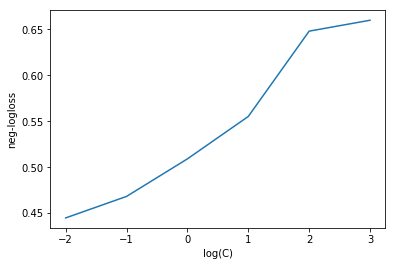

In [120]:
n_Cs = len(Cs)
n_classes = 3
scores =  np.zeros((n_classes,n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lrcv_L2.scores_[j],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

# SVM 


# 模型训练

In [52]:
from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.8,random_state = 0)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# default SVC

In [53]:
from sklearn.svm import LinearSVC

SVC1 = LinearSVC().fit(X_train_part, y_train_part)

In [54]:
from sklearn import metrics
y_predict = SVC1.predict(X_val)

print("Classification report for classifier %s:\n%s\n" % (SVC1, metrics.classification_report(y_val, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_predict))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.10      0.02      0.03        59
          1       0.35      0.20      0.25       182
          2       0.74      0.91      0.82       559

avg / total       0.61      0.68      0.63       800


Confusion matrix:
[[  1  24  34]
 [  3  36 143]
 [  6  43 510]]


# 线性SVM正则参数调优

In [55]:
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

accuracy: 0.67625
accuracy: 0.69375
accuracy: 0.6925
accuracy: 0.69125
accuracy: 0.685
accuracy: 0.64125
accuracy: 0.56125


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


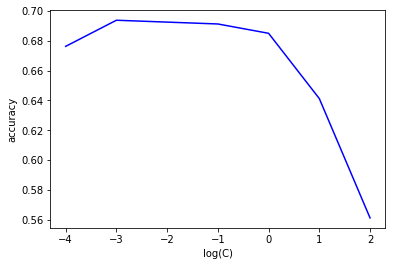

In [56]:
#需要调优的参数
C_s = np.logspace(-4, 2, 7)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    tmp = fit_grid_point_Linear(oneC, X_train_part, y_train_part, X_val, y_val)
    accuracy_s.append(tmp)

x_axis = np.log10(C_s)
#for j, penalty in enumerate(penalty_s):
pyplot.plot(x_axis, np.array(accuracy_s), 'b-')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('SVM_Otto.png' )

pyplot.show()

#0.001
  

# RBF核SVM正则参数调优

In [60]:
from sklearn.svm import SVC

def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    
    print(C) 
    print(gamma) 
    print("accuracy: {}".format(accuracy))
    return accuracy

In [65]:

#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train_part, y_train_part, X_val, y_val)
        accuracy_s.append(tmp)

        


0.01
0.01
accuracy: 0.69875
0.01
0.1
accuracy: 0.69875
0.01
1.0
accuracy: 0.69875
0.01
10.0
accuracy: 0.69875
0.01
100.0
accuracy: 0.69875
0.1
0.01
accuracy: 0.69875
0.1
0.1
accuracy: 0.69875
0.1
1.0
accuracy: 0.69875
0.1
10.0
accuracy: 0.69875
0.1
100.0
accuracy: 0.69875
1.0
0.01
accuracy: 0.70125
1.0
0.1
accuracy: 0.69125
1.0
1.0
accuracy: 0.69875
1.0
10.0
accuracy: 0.7
1.0
100.0
accuracy: 0.7
10.0
0.01
accuracy: 0.67875
10.0
0.1
accuracy: 0.67125
10.0
1.0
accuracy: 0.69625
10.0
10.0
accuracy: 0.7
10.0
100.0
accuracy: 0.7
100.0
0.01
accuracy: 0.6525
100.0
0.1
accuracy: 0.66875
100.0
1.0
accuracy: 0.69625
100.0
10.0
accuracy: 0.7
100.0
100.0
accuracy: 0.7


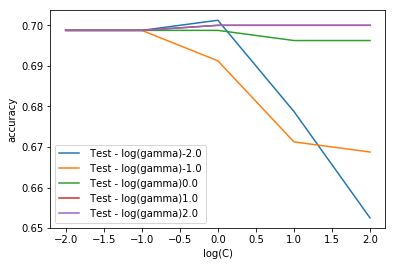

In [66]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))

pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('RBF_SVM_Otto.png' )

pyplot.show()

# 结果

In [86]:
from sklearn.svm import SVC

SVC3 =  SVC( C = 1.0, kernel='rbf', gamma = 0.1)
SVC3.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
y_test = SVC3.predict(X_test)
print (y_test)

test["result"]=y_test

test.info()

test.to_csv('result.csv', index=False)

[2 2 2 ..., 2 2 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74659 entries, 0 to 74658
Columns: 226 entries, listing_id to result
dtypes: float64(7), int64(219)
memory usage: 128.7 MB


In [89]:
test.to_csv('result.csv', index=False)